# Телеметрия за все годы проведения эксперимента СФЕРА на Байкале

In [1]:
!date
!pwd

Ср июл 15 22:13:35 MSK 2020
/home/alena/SPHERE/Analysis/Telemetry


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime as dt
from math import pi
#чтобы датасеты с множеством колонок отображались полностью
pd.set_option('display.max_rows', 100, 'display.max_columns', 200)

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14
#plt.rcParams['font.size'] = 12

## Чтение данных

In [4]:
dirname = '~/SPHERE/ExpData/Data.telemetry/'
!ls $dirname

current_hv_code_everymin.dat  datum_2011_min.csv  datum_2013_sec.csv
currents_corrected.txt	      datum_2011_sec.csv  high_code.dat
datum_2009_sec.csv	      datum_2012_min.csv  high_kod.dat
datum_2010_min.csv	      datum_2012_sec.csv  telemetry_min.csv
datum_2010_sec.csv	      datum_2013_min.csv


In [5]:
name = 'telemetry_min.csv'
datum = pd.read_csv(dirname + name)
print(datum.shape)
datum.columns

(7169, 38)


Index(['Unnamed: 0', 'mm', 'year', 'month', 'day', 'time', 'N', 'E', 'H',
       'H-455', 'Gqi', 'Gsn', 'Ghdp', 'Ggs', 'compass', 'P0_code', 'T0_code',
       'P_hpa0', 'T0,C', 'P1_code', 'T1_code', 'P_hpa1', 'T1,C', 'U15,V',
       'U5,V', 'Uac,V', 'I,A', 'Tpow,C', 'Tmos,C', 'Bot,C', 'Top,C', 'Clin1',
       'Clin2', 'ClinTh', 'run', 'dN', 'dE', 'utime'],
      dtype='object')

In [6]:
def plot_for_paper(year, name, yaxislabel, file=None):

    flights = datum[ datum.year == year ].run.max()
        
    # проверка на существование
    nodata = 0
    for i in range(1, flights + 1):
        data = datum[ (datum.year == year) & (datum.run == i) ]
        if len(data[['utime', name]].dropna()) == 0:
            nodata += 1
    if nodata == flights:
        return
    
    # рисование
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['mP-','bx--', 'gs:', 'rd-.', 'co-', 'k*--']
    fig, ax = plt.subplots()

    for i in range(1, flights + 1):
        data = datum[ (datum.year == year) & (datum.run == i) ]
        data = data[['utime', name]].dropna()
        x = [dt.datetime.strptime(i, '%H:%M:%S') for i in data.utime]
        y = data[name]
        #print(year, i, len(y))   

        #label = 'flight ' + str(i)
        label = str(i)
        ax.plot(x, y, plcol[i-1], alpha=0.9, label = label)

    if name in ['H-455','ClinTh']:
        plt.ylim(0)
     
    ax.xaxis.set_major_formatter(fmt)
    plt.xlabel('Flight time, UTC')
    plt.ylabel(yaxislabel)
    ax.set_title(str(year))
    plt.legend(borderaxespad=0.1)
    plt.grid()
    
    # save file
    if file:
        plt.savefig(file, bbox_inches='tight')    

### Высота

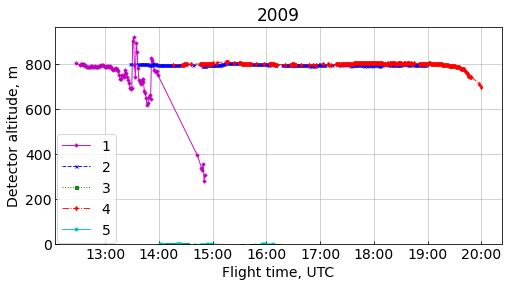

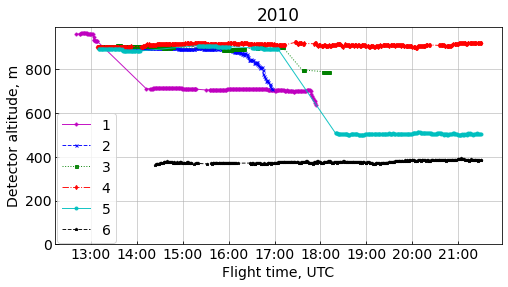

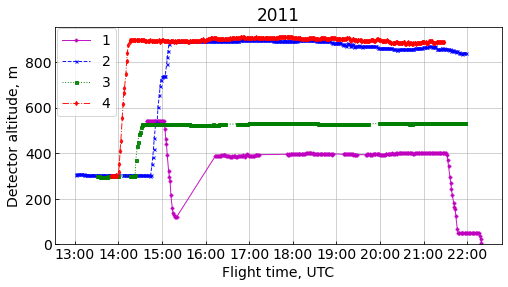

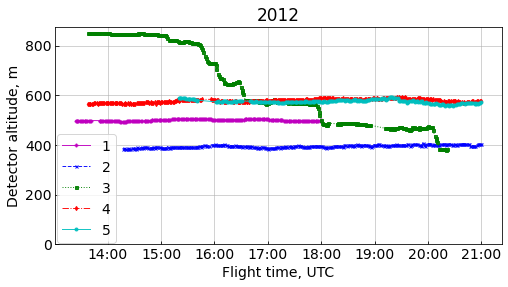

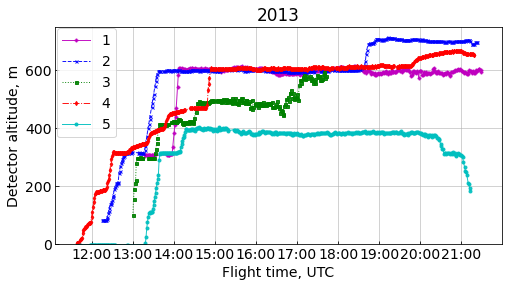

In [13]:
for year in range(2009, 2014):
    plot_for_paper(year, 'H-455', 'Detector altitude, m', str(year) + '_height.png')
    #plot_for_paper(year, 'H-455', 'Detector altitude, m', str(year) + '_height.png')

### Давление

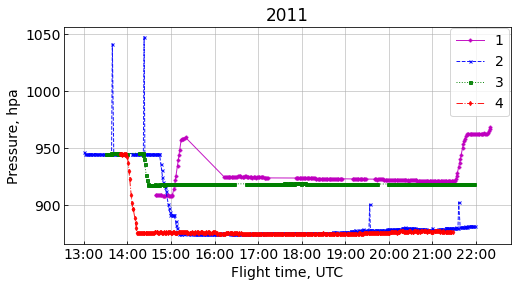

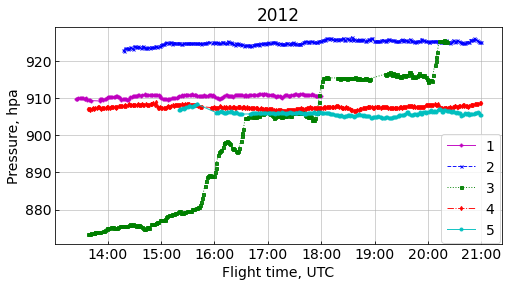

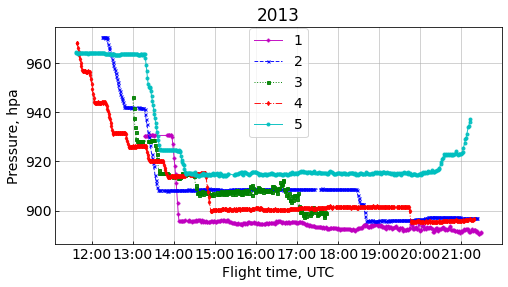

In [14]:
for year in range(2010, 2014):
    plot_for_paper(year, 'P_hpa0', 'Pressure, hpa', str(year) + '_pressure.png')

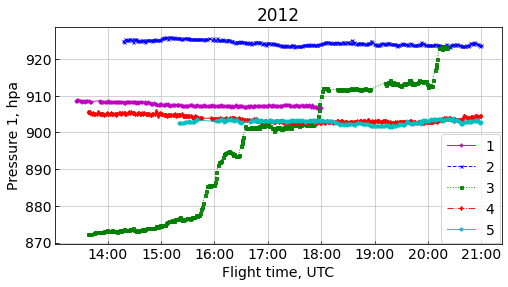

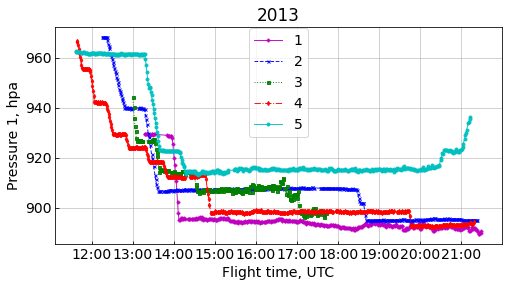

In [15]:
for year in range(2010, 2014):
    plot_for_paper(year, 'P_hpa1', 'Pressure 1, hpa', str(year) + '_pressure1.png')

### Компас

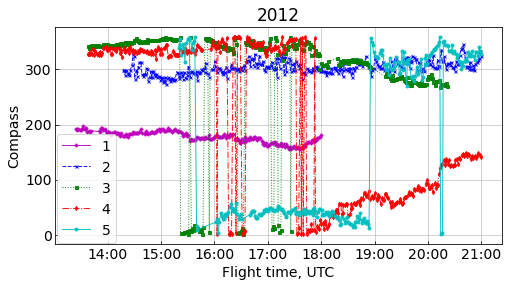

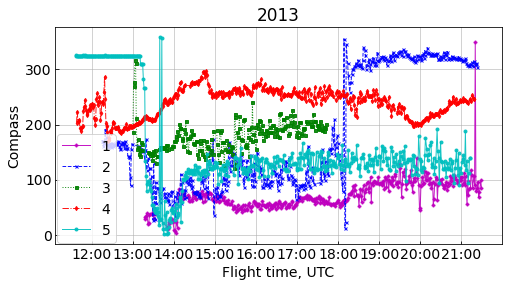

In [11]:
for year in range(2010, 2014):
    plot_for_paper(year, 'compass',  'Compass', str(year) + '_compass.png')

In [35]:
datum.columns

Index(['Unnamed: 0', 'mm', 'year', 'month', 'day', 'time', 'N', 'E', 'H',
       'H-455', 'Gqi', 'Gsn', 'Ghdp', 'Ggs', 'compass', 'P0_code', 'T0_code',
       'P_hpa0', 'T0,C', 'P1_code', 'T1_code', 'P_hpa1', 'T1,C', 'U15,V',
       'U5,V', 'Uac,V', 'I,A', 'Tpow,C', 'Tmos,C', 'Bot,C', 'Top,C', 'Clin1',
       'Clin2', 'ClinTh', 'run', 'dN', 'dE', 'utime'],
      dtype='object')

### Наклоны

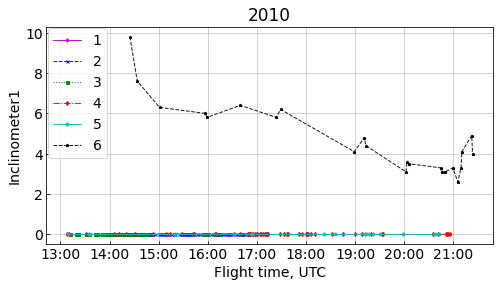

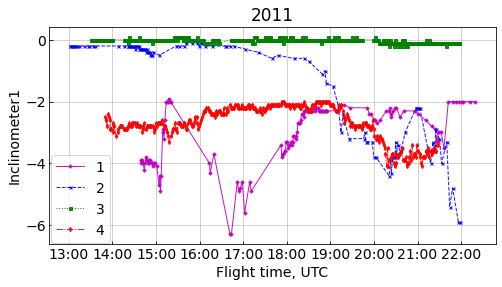

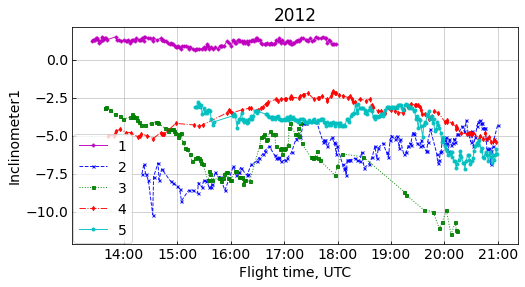

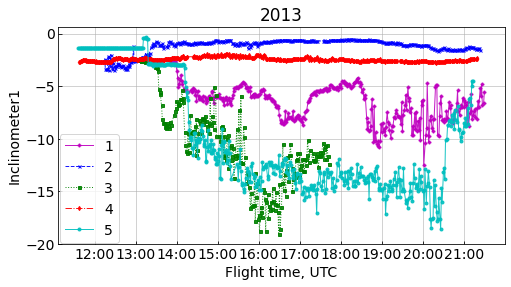

In [25]:
for year in range(2010, 2014):
    plot_for_paper(year, 'Clin1',  'Inclinometer1', str(year) + '_clin1.png')

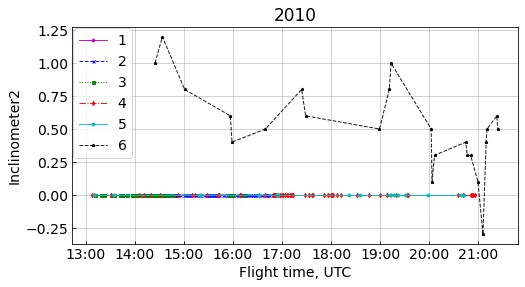

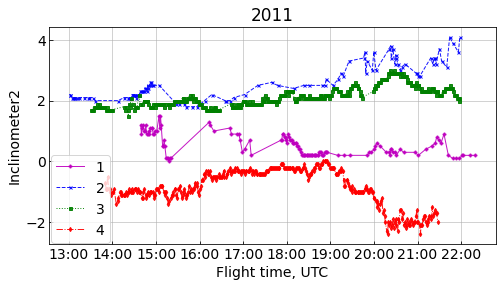

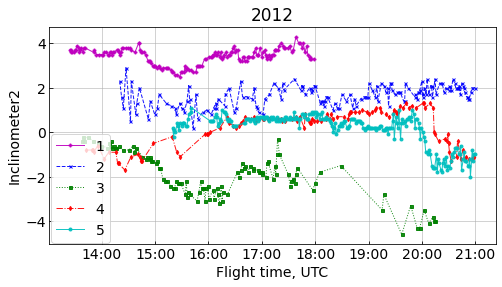

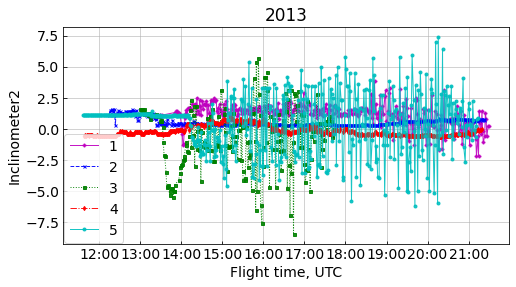

In [24]:
for year in range(2010, 2014):
    plot_for_paper(year, 'Clin2',  'Inclinometer2', str(year) + '_clin2.png')

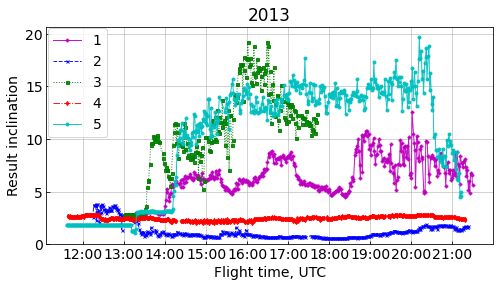

In [23]:
for year in range(2010, 2014):
    plot_for_paper(year, 'ClinTh',  'Result inclination', str(year) + '_clin_th.png')

### Температура

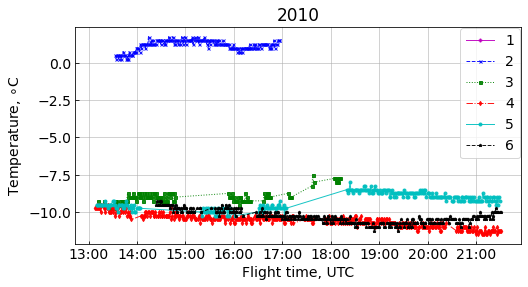

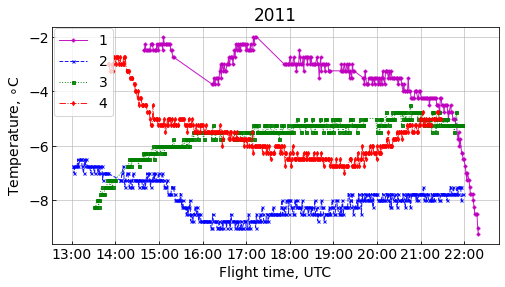

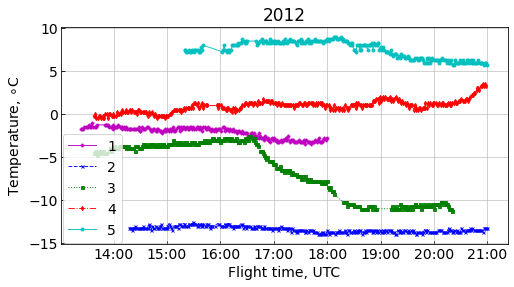

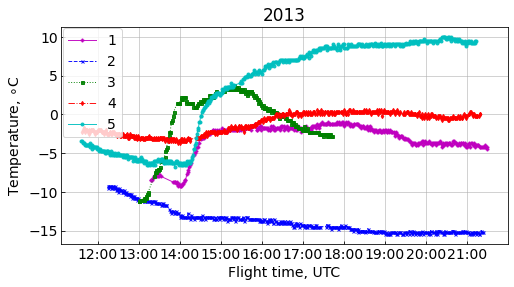

In [16]:
for year in range(2010, 2014):
    plot_for_paper(year, 'Tmos,C',  'Temperature, $\circ$C', str(year) + '_tmos.png')

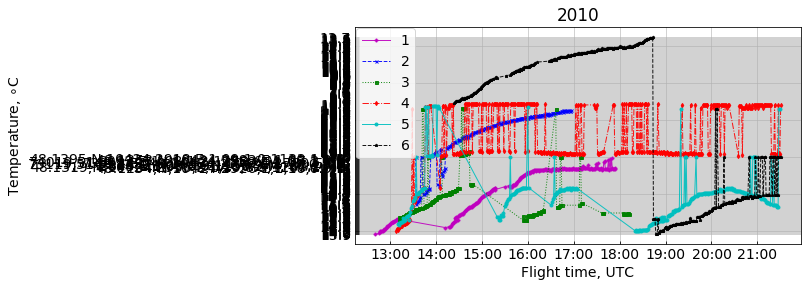

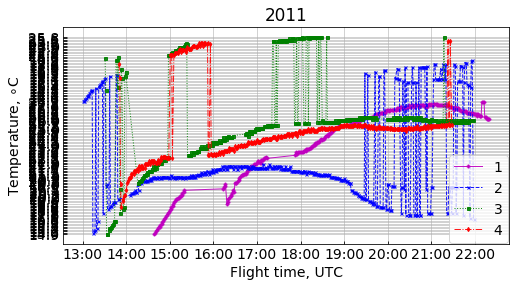

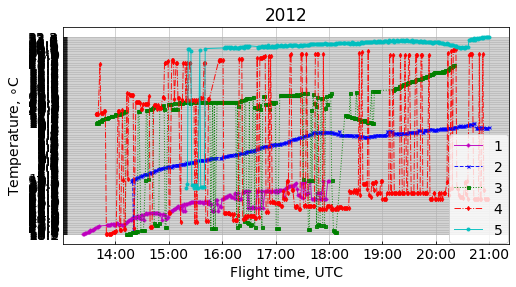

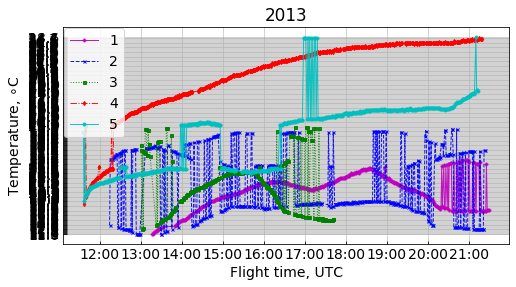

In [22]:
for year in range(2010, 2014):
    plot_for_paper(year, 'Bot,C',  'Temperature, $\circ$C', str(year) + '_tbot.pdf')

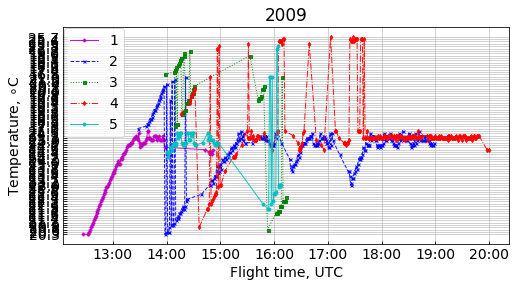

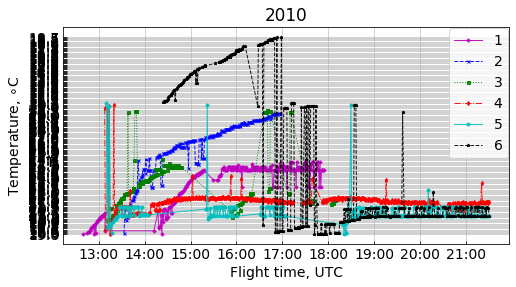

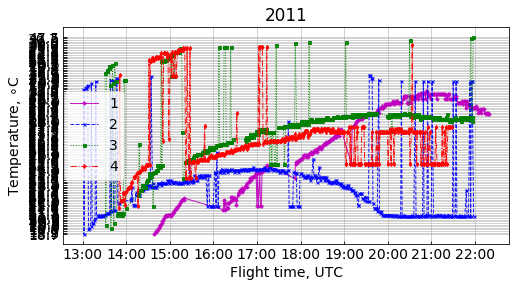

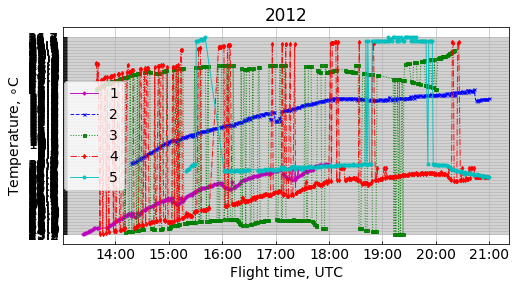

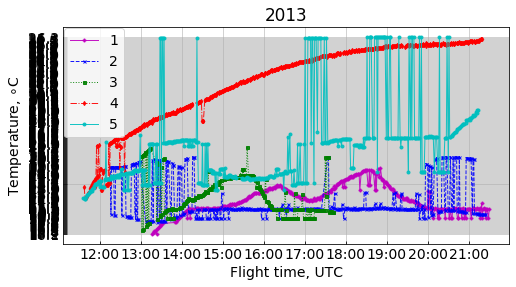

In [23]:
for year in range(2009, 2014):
    plot_for_paper(year, 'Top,C', 'Temperature, $\circ$C', str(year) + '_ttop.pdf')

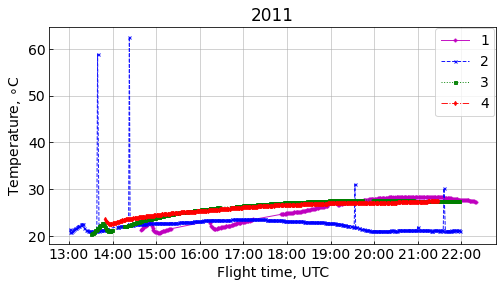

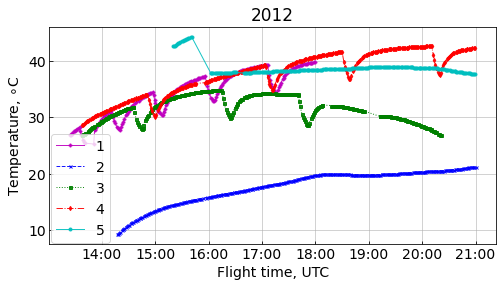

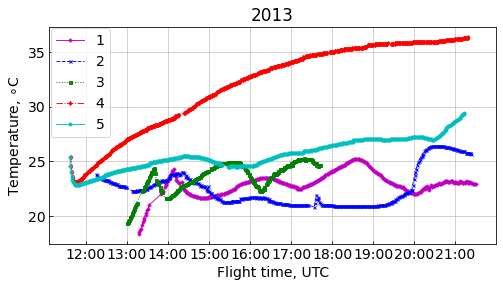

In [20]:
for year in range(2009, 2014):
    plot_for_paper(year, 'T0,C', 'Temperature, $\circ$C', str(year) + '_t0.png')

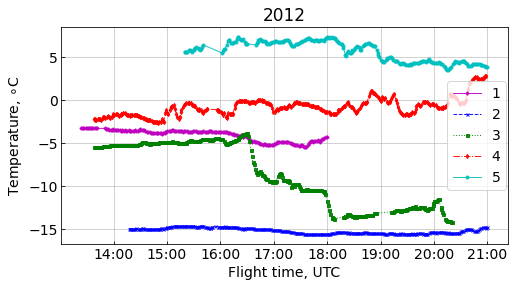

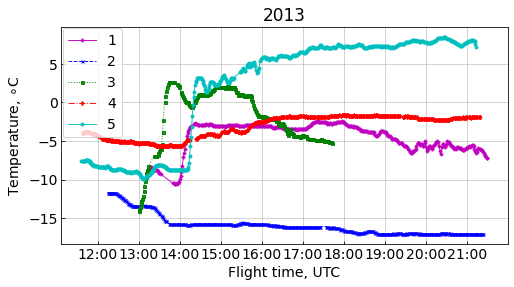

In [19]:
for year in range(2009, 2014):
    plot_for_paper(year, 'T1,C', 'Temperature, $\circ$C', str(year) + '_t1.png')

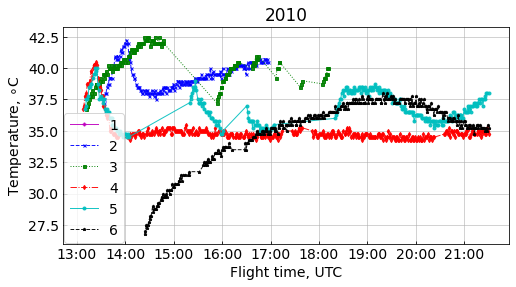

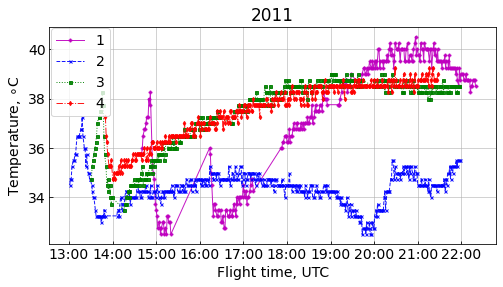

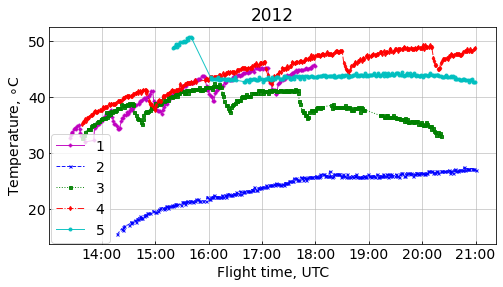

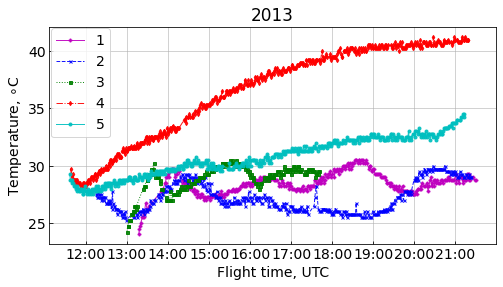

In [21]:
for year in range(2009, 2014):
    plot_for_paper(year, 'Tpow,C', 'Temperature, $\circ$C', str(year) + '_Tpow.png')

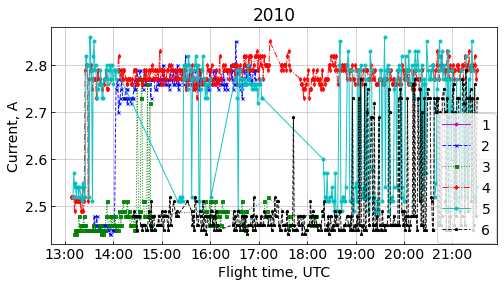

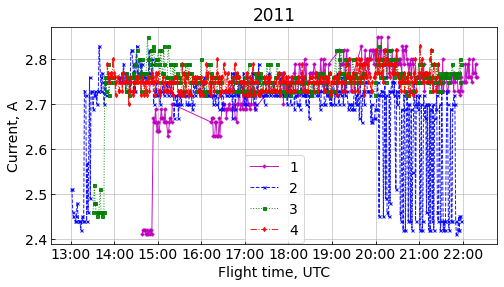

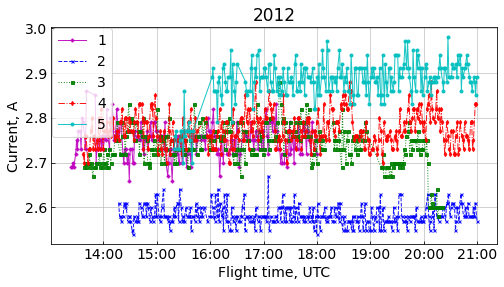

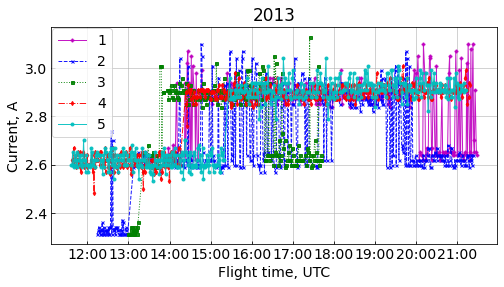

In [22]:
for year in range(2009, 2014):
    plot_for_paper(year, 'I,A', 'Current, A', str(year) + '_I.png')

In [17]:
datum

,Unnamed: 0,mm,year,month,day,time,N,E,H,H-455,Gqi,Gsn,Ghdp,Ggs,compass,P0_code,T0_code,P_hpa0,"T0,C",P1_code,T1_code,P_hpa1,"T1,C","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C","Bot,C","Top,C",Clin1,Clin2,ClinTh,run,dN,dE,utime
0,0,0,2010,3,7,123952,5148.0891,10424.4104,1416.1,961.1,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,19.8,NaN,NaN,NaN,1,13.729398,103.538340,12:39:52
1,1,1,2010,3,7,124506,5148.0893,10424.4058,1418.2,963.2,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,20.0,NaN,NaN,NaN,1,14.100462,98.246380,12:45:06
2,2,2,2010,3,7,124607,5148.0878,10424.4010,1419.4,964.4,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,18.6,NaN,NaN,NaN,1,11.317476,92.724336,12:46:07
3,3,3,2010,3,7,124708,5148.0828,10424.4001,1419.5,964.5,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.6,NaN,NaN,NaN,1,2.040856,91.688952,12:47:08
4,4,4,2010,3,7,124809,5148.0810,10424.4045,1419.8,964.8,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.8,NaN,NaN,NaN,1,-1.298727,96.750827,12:48:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7164,40920,3599,2009,3,1,160353,5148.0648,10424.3376,453.9,-1.1,2,8,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.2,22.8,NaN,NaN,NaN,5,0.000000,0.230085,16:03:53
7165,40980,3659,2009,3,1,160453,5148.0648,10424.3376,453.4,-1.6,2,8,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.1,22.9,NaN,NaN,NaN,5,0.000000,0.230085,16:04:53
7166,41040,3719,2009,3,1,160553,5148.0648,10424.3375,453.7,-1.3,2,8,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.2,23.0,NaN,NaN,NaN,5,0.000000,0.115043,16:05:53
7167,41100,3779,2009,3,1,160653,5148.0648,10424.3375,454.0,-1.0,2,8,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.2,23.0,NaN,NaN,NaN,5,0.000000,0.115043,16:06:53


### Снос

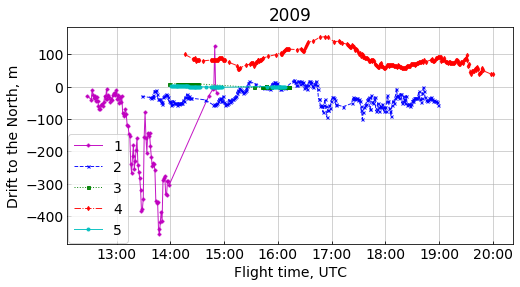

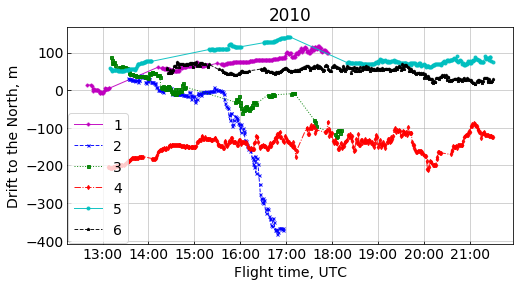

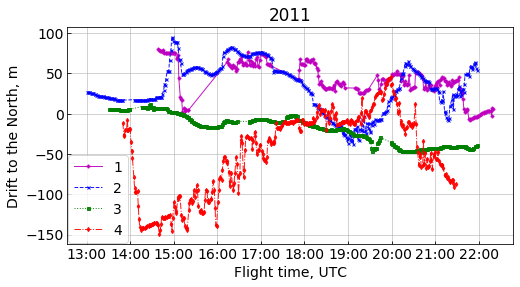

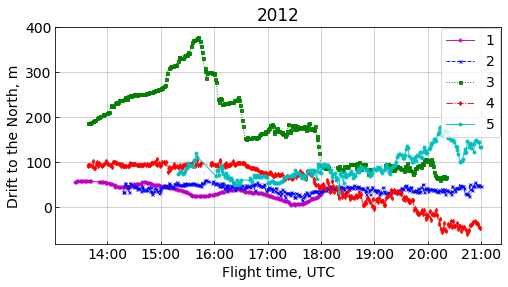

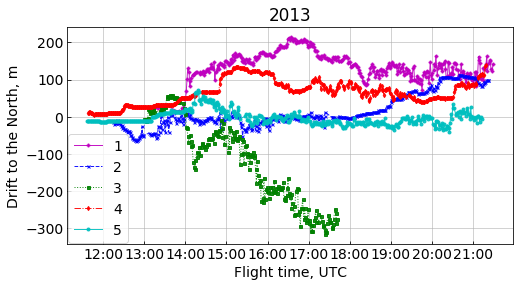

In [33]:
for year in range(2009, 2014):
    #plot_for_paper(year, 'dN', 'Drift to the North, m', str(year) + '_dN.pdf')
    plot_for_paper(year, 'dN', 'Drift to the North, m', str(year) + '_dN.png')

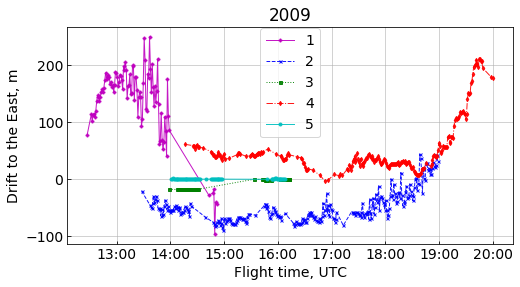

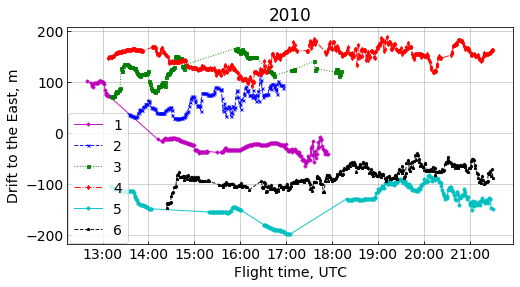

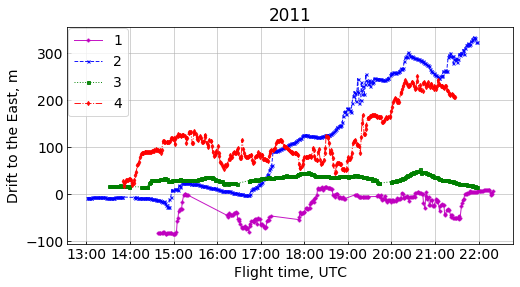

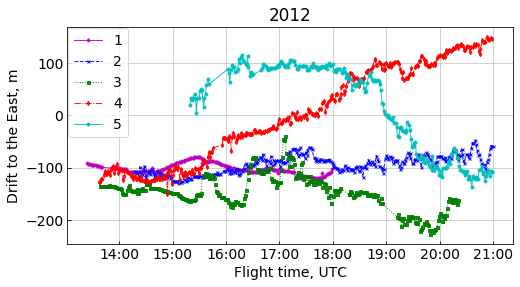

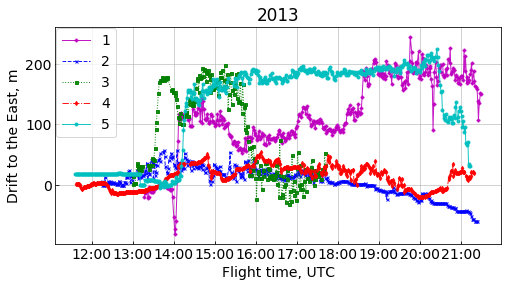

In [32]:
for year in range(2009, 2014):
    #plot_for_paper(year, 'dE', 'Drift to the East, m', str(year) + '_dE.pdf')
    plot_for_paper(year, 'dE', 'Drift to the East, m', str(year) + '_dE.png')

### Распределение по высотам

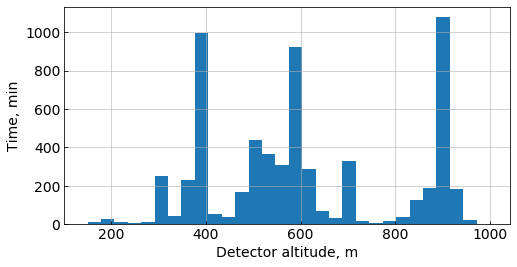

In [130]:
""" Время на разных высотах за все время"""
fig = plt.figure(figsize=(8,4))
plt.hist(datum["H-455"], range=[150, 1000], bins=30)
plt.xlim(100)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.grid()

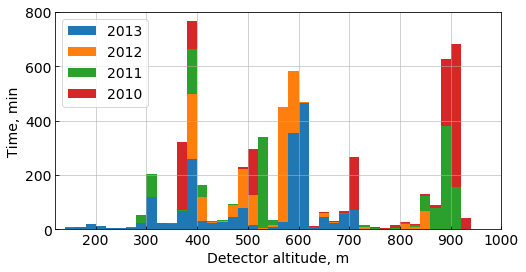

In [19]:
""" Время на разных высотах за все время"""
fig = plt.figure(figsize=(8,4))
plt.rcParams['font.size'] = 14
x=[]
label=[]
for year in range(2013, 2009, -1):
    x.append(datum["H-455"][datum.year == year])
    label.append(str(year))
hmin = 140
bins = 40
hmax = hmin + 20 * bins
plt.hist(x, range=[hmin, hmax], bins=bins,
             histtype='barstacked', 
             stacked=True, 
             label=label)
plt.xlim(120, 1000)
plt.ylim(0, 800)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.legend()
plt.grid()
plt.savefig("time_on_altitude.pdf", bbox_inches='tight')    

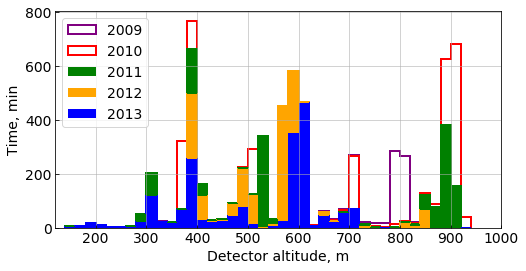

In [84]:
""" Время на разных высотах за все время"""
fig = plt.figure(figsize=(8,4))
#fig = plt.figure(figsize=(16,6))
plt.rcParams['font.size'] = 14

hmin = 140
bins = 40
hmax = hmin + 20 * bins
#colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
#plcol = ['m','b', 'g', 'r', 'c', 'k']
plcol = ['b','orange', 'g', 'r', 'purple', 'k']

x1 = []
label = []
for year in range(2013, 2008, -1):
    x1.append(datum["H-455"][datum.year == year])
    if year <= 2010:
        label.append(str(year))
    else:
        label.append("")
plt.hist(x1, range=[hmin, hmax], bins=bins,
             histtype='step', linewidth=2, color=plcol[:5],
             stacked=True, 
             label=label)

x = []
label = []
for year in range(2013, 2010, -1):
    x.append(datum["H-455"][datum.year == year])
    label.append(str(year))
plt.hist(x, range=[hmin, hmax], bins=bins,
             histtype='stepfilled', color=plcol[:3],
             stacked=True, 
             label=label)

plt.xlim(120, 1000)
#plt.ylim(0, 1250)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.legend(loc=2)
plt.grid()
plt.savefig("time_on_altitude.pdf", bbox_inches='tight')    

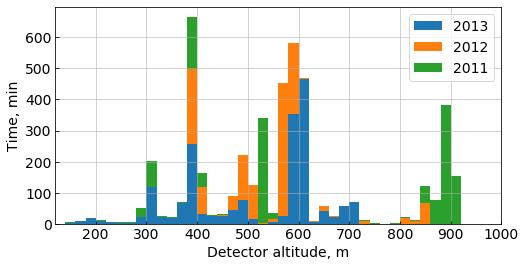

In [206]:
""" Время на разных высотах за все время"""
fig = plt.figure(figsize=(8,4))
x=[]
label=[]
for year in range(2013, 2010, -1):
    x.append(datum["H-455"][datum.year == year])
    label.append(str(year))
hmin = 140
bins = 40
hmax = hmin + 20 * bins
plt.hist(x, range=[hmin, hmax], bins=bins,
             histtype='barstacked', 
             stacked=True, 
             label=label)
plt.xlim(120, 1000)
#plt.ylim(0, 1150)
plt.xlabel('Detector altitude, m')
plt.ylabel("Time, min")
plt.legend()
plt.grid()
#plt.savefig("time_on_altitude.pdf", bbox_inches='tight')    

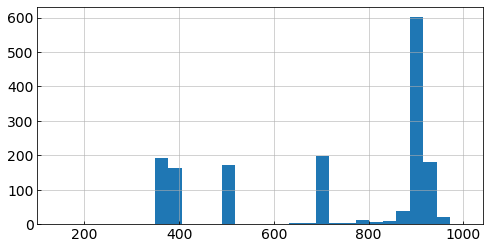

In [163]:
plt.hist(datum["H-455"][datum.year == 2010], range=[150, 1000], bins=30,)
plt.xlim(100)
plt.grid()

# Снос